# Amazon reviews For a Ear Phone

In [1]:
#pip install amazon-product-review-scraper

In [2]:
#from amazon_product_review_scraper import amazon_product_review_scraper
#review_scraper = amazon_product_review_scraper(amazon_site="amazon.in", product_asin="B08S6Z2L7P")
#reviews_df = review_scraper.scrape()

In [3]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
#df = pd.DataFrame(reviews_df)
#df.to_csv('reviews.csv')

In [5]:
review = pd.read_csv('reviews.csv',error_bad_lines = False)
review.head

<bound method NDFrame.head of       Unnamed: 0                              date_info              name  \
0              0  Reviewed in India on 26 February 2021        M.L.Dewani   
1              1  Reviewed in India on 17 February 2021             Athar   
2              2  Reviewed in India on 18 February 2021       Bhagwanaram   
3              3   Reviewed in India on 9 February 2021   Sourabh Jagoree   
4              4   Reviewed in India on 8 February 2021        Abdulvahid   
...          ...                                    ...               ...   
1387        1387      Reviewed in India on 3 March 2021  HITESH DHAMDHERE   
1388        1388  Reviewed in India on 10 February 2021          sachin k   
1389        1389  Reviewed in India on 18 February 2021     Hrutik Borate   
1390        1390      Reviewed in India on 23 June 2021             Robil   
1391        1391     Reviewed in India on 17 April 2021       Prakash s k   

                                             

In [6]:
review = review.iloc[:,3:]
review.head()

,title,content,rating
0,"Heads you win, Tails you lose.",Every product has a head and tail after it get...,4.0 out of 5 stars
1,Truly genuine neckband,Today i am gonna Share my Genuine Veiws on WeC...,5.0 out of 5 stars
2,The Bluetooth is very nice.,The nickband is really good for the price.. It...,5.0 out of 5 stars
3,"Very flexible neckand, quality is also perfect...","Likes the product very much, sound quality att...",5.0 out of 5 stars
4,Good quality,"Wirelength is too long, battery back up is ok ...",5.0 out of 5 stars


In [7]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [8]:
review = [x.strip() for x in review.content] # remove both the leading and the trailing characters
review = [x for x in review if x] # removes empty strings, because they are considered in Python as False
review[0:10]

['Every product has a head and tail after it gets quality control check from the manufacturer. Heads you win, tails you lose. If you get a good piece you are lucky and if not you have to fight for refund or replacement. This is Universal procedure. For Rs.700/- you can not expect Bose earbuds. Even in high end items same head and tail formula applies.. Now having said so my first piece was defective.I got replacement which is just good if not fine. Bluetooth connectivity is poor for this product otherwise rest of the functions are 4 star and if you still want a 5 star product you have to pay more for a higher quality product. For theatrical 8 D depth you can not expect that on a cheap portable device. You need soundproof and calm surroundings for that enjoyment.. I am in-depth music connoisseur and have tested all musical headphones, earbuds, portable speakers and home theater equipment.Comparing WeCool N1 to any such competitors at Rs.700/- is a deal.And to end my review I again repea

In [9]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(review))
sentences[5:15]

['Even in high end items same head and tail formula applies.. Now having said so my first piece was defective.I got replacement which is just good if not fine.',
 'Bluetooth connectivity is poor for this product otherwise rest of the functions are 4 star and if you still want a 5 star product you have to pay more for a higher quality product.',
 'For theatrical 8 D depth you can not expect that on a cheap portable device.',
 'You need soundproof and calm surroundings for that enjoyment..',
 'I am in-depth music connoisseur and have tested all musical headphones, earbuds, portable speakers and home theater equipment.Comparing WeCool N1 to any such competitors at Rs.700/- is a deal.And to end my review I again repeat, if you get heads you are very lucky for the price you paid.',
 'Hope my review helps.',
 'Today i am gonna Share my Genuine Veiws on WeCool N1 neckband which i have Purchased recently.',
 'I think it will be a Best Product For neckband lovers.',
 'Packing :.',
 'The packing

In [10]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Every product has a head and tail after it get...
1,"Heads you win, tails you lose."
2,If you get a good piece you are lucky and if n...
3,This is Universal procedure.
4,For Rs.700/- you can not expect Bose earbuds.
...,...
2171,Easy to carry and use.
2172,Don't think just buy.
2173,Sound quality of earphones is just superb and ...
2174,Bluetooth pairing is also very fast and overal...


In [11]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [12]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [13]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [14]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
1384,"Excellent sound quality, super bass quality,wo...",25,50
2053,Nice nackband i loved it sound is awesome smal...,26,52
1800,I really like this product and affordable pric...,28,72
1059,Very powerful brand you nice better big you su...,30,76
1676,Not good Calling Like it Avg ok Super Worst Re...,30,37
1997,"Sound quality is very good, vocals are Crystal...",32,125
1762,Gives nice hearing experience so good device n...,35,50
1675,Normal not higher Not in good range Very good ...,36,172
1799,And built quality is very cheap I'll not buy i...,42,80
1805,We cool company product was EXLELENT Excellent...,45,131


In [15]:
sent_df['sentiment_value'].describe()

count    2176.000000
mean        2.648897
std         4.543823
min       -15.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        45.000000
Name: sentiment_value, dtype: float64

In [16]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Every product has a head and tail after it get...,0,16
3,This is Universal procedure.,0,4
4,For Rs.700/- you can not expect Bose earbuds.,0,8
6,Bluetooth connectivity is poor for this produc...,-2,34
7,For theatrical 8 D depth you can not expect th...,0,15


In [17]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

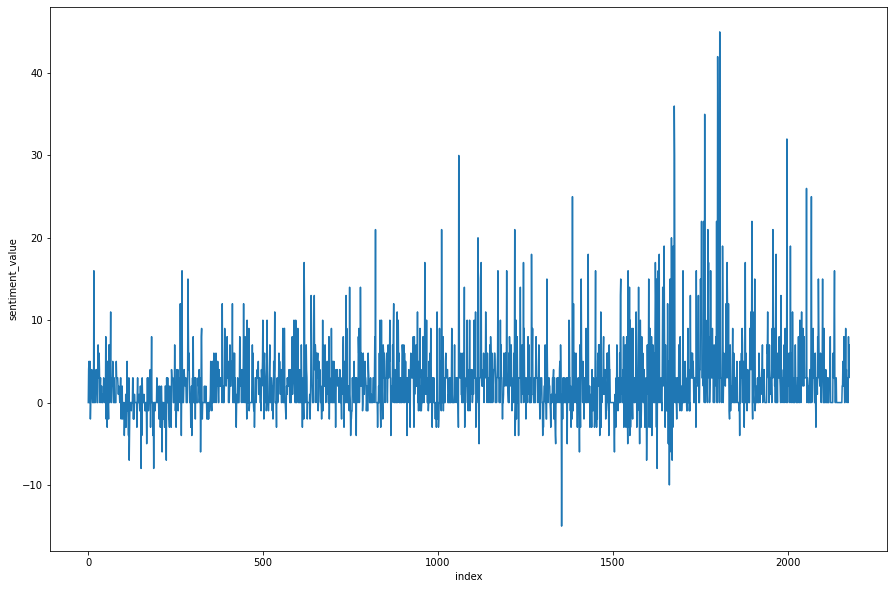

In [18]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [19]:
#By seeing graph and mean values we can conclude that earphone has more positive opinion compared to neagitive

# Elon-Musk

In [20]:
data = pd.read_csv("Elon_musk.csv",error_bad_lines = False,encoding = 'latin-1')
data = data.iloc[:,1:]
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [21]:
data = [x.strip() for x in data.Text] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [22]:
from nltk import tokenize
sentences1 = tokenize.sent_tokenize(" ".join(data))
sentences1[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [23]:
sent_df1 = pd.DataFrame(sentences1, columns=['sentence'])
sent_df1

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [24]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [25]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [26]:
sent_df1['sentiment_value'] = sent_df1['sentence'].apply(calculate_sentiment)

In [27]:
sent_df1['word_count'] = sent_df1['sentence'].str.split().apply(len)
sent_df1.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
183,Theres some great AI out ther https://t.co/v...,10,48
224,"@PPathole @karpathy For a second there, I thou...",11,69
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [28]:
sent_df1['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.671421
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

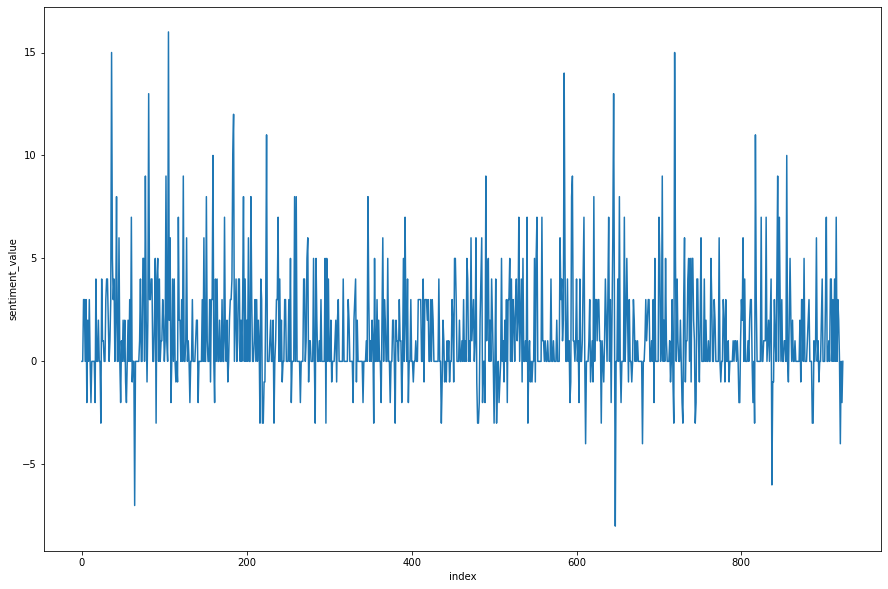

In [29]:
sent_df1['index']=range(0,len(sent_df1))
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df1)

In [30]:
#More positive tweets compared to neagitive